# 实验结果分析：Token 生成速度与阈值的关系

本 Notebook 用于分析 `experiment_summary_20260117_030023.json` 中的实验数据。
重点考察 `little_draft_threshold` (对应配置中的 `small_draft_threshold`) 和 `draft_target_threshold` 对 `throughput` (Token 生成速度) 的影响。

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans'] # 尝试支持中文显示，如果没有 SimHei 会回退
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

In [14]:
import os
print(f"Current working directory: {os.getcwd()}")
print(f"Files in current directory: {os.listdir('.')}")
print(f"Is file exists: {os.path.exists('experiment_summary_20260126_185941.json')}")

Current working directory: /home/tiantianyi/code/DuoDecoding
Files in current directory: ['.venv', 'gsm8k_ar_log.log', 'auto_train_manager.py', 'plot_thresholds_20260117.ipynb', 'docs', '.vscode', 'scripts', 'hyperparametertable.md', 'uv.lock', 'venv_docker', 'plot_confidence.ipynb', 'manager.log', 'experiment_summary_20260120_180108.json', '.python-version', 'adaptiveexp.py', 'experiment_summary_20260123_091833.json', 'experiment_summary_20260119_124651.json', '.gitmodules', 'unsloth', 'experiment_summary_20260123_092248.json', 'experiment_summary_20260122_192252.json', 'qwen', 'experiment_summary_20260126_153921.json', 'exp_cmd.ipynb', '.gitignore', 'exp_logs', 'gsm8k_adptive__debug_log.log', 'experiment_summary_20260119_122815.json', 'pyproject.toml', 'llama', 'experiment_summary_20260122_211331.json', 'exp.log', 'checkpoints', 'data', 'exp.py', 'plot_acceptance_rates.ipynb', 'experiment_summary_20260123_094824.json', 'eval', 'experiment_summary_20260121_225503.json', 'vicuna', 'con

In [18]:
# 读取数据
file_path = "vicuna_scan.json"

try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"成功读取 {len(data)} 条实验记录")
except FileNotFoundError:
    print(f"找不到文件: {file_path}")
    data = []

# 提取关键信息
extracted_data = []
for entry in data:
    config = entry.get("config", {})
    result = entry.get("result", {})
    
    # 提取阈值和吞吐量
    little_draft_thresh = config.get("small_draft_threshold")
    draft_target_thresh = config.get("draft_target_threshold")
    throughput = result.get("throughput")
    
    # 提取前向传播次数和计算时间
    little_fwd = result.get("little_forward_times")
    draft_fwd = result.get("draft_forward_times")
    target_fwd = result.get("target_forward_times")
    computation_time = result.get("computation_time")
    
    # 提取通信相关指标
    comm_time = result.get("communication_time")
    edge_cloud_data = result.get("edge_cloud_data_bytes")
    edge_end_data = result.get("edge_end_data_bytes")
    comm_energy = result.get("comm_energy")
    
    # 提取数据集名称
    eval_dataset = config.get("eval_dataset", "unknown")
    dataset_name = eval_dataset.split("/")[-1].replace("eval_", "").replace(".py", "").replace("_noeval", "")
    
    if little_draft_thresh is not None and draft_target_thresh is not None and throughput is not None:
        extracted_data.append({
            "dataset": dataset_name,
            "little_draft_threshold": float(little_draft_thresh),
            "draft_target_threshold": float(draft_target_thresh),
            "throughput": float(throughput),
            "little_forward_times": int(little_fwd) if little_fwd is not None else 0,
            "draft_forward_times": int(draft_fwd) if draft_fwd is not None else 0,
            "target_forward_times": int(target_fwd) if target_fwd is not None else 0,
            "computation_time": float(computation_time) if computation_time is not None else None,
            "comm_time": float(comm_time) if comm_time is not None else None,
            "edge_cloud_data_MB": float(edge_cloud_data) / (1024*1024) if edge_cloud_data is not None else None,
            "edge_end_data_MB": float(edge_end_data) / (1024*1024) if edge_end_data is not None else None,
            "comm_energy": float(comm_energy) if comm_energy is not None else None
        })

# 创建 DataFrame
df = pd.DataFrame(extracted_data)

# 显示前几行
if not df.empty:
    print(f"提取到 {len(df)} 条有效数据")
    display(df.head())
    display(df.describe())
else:
    print("提取到的数据为空")

成功读取 27 条实验记录
提取到 26 条有效数据


,dataset,little_draft_threshold,draft_target_threshold,throughput,little_forward_times,draft_forward_times,target_forward_times,computation_time,comm_time,edge_cloud_data_MB,edge_end_data_MB,comm_energy
0,mt_bench,0.6,0.1,13.600390,8248,15098,7530,1136.642681,4.387340,2.719393,2.473520,2.193670
1,mt_bench,0.6,0.2,13.509632,8187,15318,7483,1149.197427,4.377423,2.713947,2.460917,2.188712
2,mt_bench,0.7,0.1,13.475118,9227,14942,7453,1156.182781,4.437600,2.741947,2.587833,2.218800
3,mt_bench,0.7,0.2,13.487390,9153,15155,7402,1157.349663,4.425666,2.735907,2.567541,2.212833
4,mt_bench,0.7,0.3,12.947990,9019,15709,7301,1226.299451,4.419448,2.734358,2.540987,2.209724


,little_draft_threshold,draft_target_threshold,throughput,little_forward_times,draft_forward_times,target_forward_times,computation_time,comm_time,edge_cloud_data_MB,edge_end_data_MB,comm_energy
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.703846,0.196154,14.484910,6351.346154,10031.807692,4888.730769,701.186369,2.870234,1.768754,1.721149,1.435117
std,0.082369,0.082369,0.652676,2321.010417,3478.431808,1682.410665,304.459334,1.058383,0.654882,0.614639,0.529192
min,0.600000,0.100000,12.947990,4183.000000,7362.000000,3621.000000,485.838879,2.084696,1.287636,1.201479,1.042348
25%,0.600000,0.100000,13.950713,4726.750000,7702.250000,3747.500000,498.073754,2.130702,1.299842,1.280642,1.065351
50%,0.700000,0.200000,14.816330,5706.500000,7891.000000,3871.000000,510.103610,2.238506,1.384716,1.403866,1.119253
75%,0.800000,0.300000,14.910666,8232.750000,14796.000000,7226.250000,1112.529240,4.384861,2.718031,2.470369,2.192430
max,0.800000,0.300000,15.173699,10961.000000,15709.000000,7530.000000,1226.299451,4.458548,2.741947,2.786215,2.229274


/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs

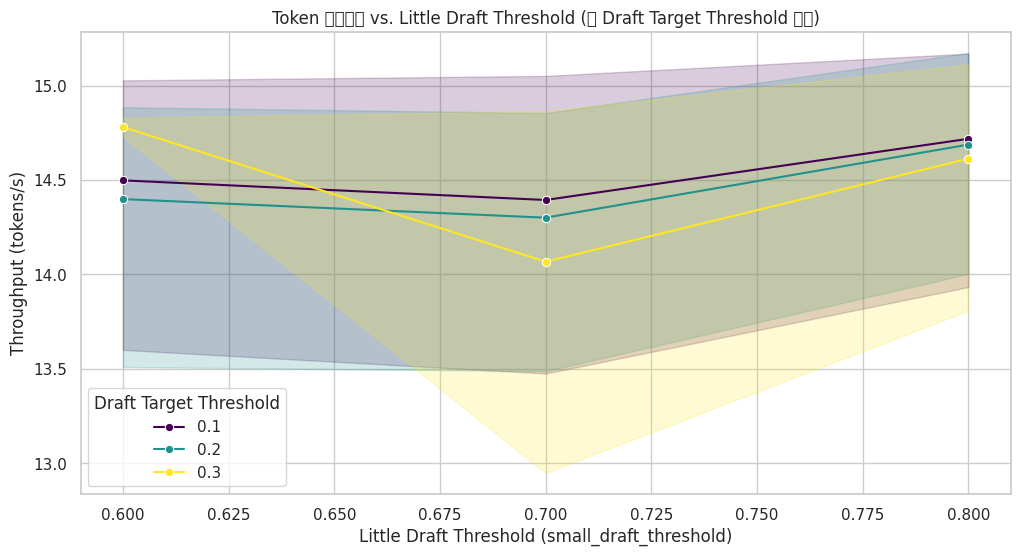

/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs

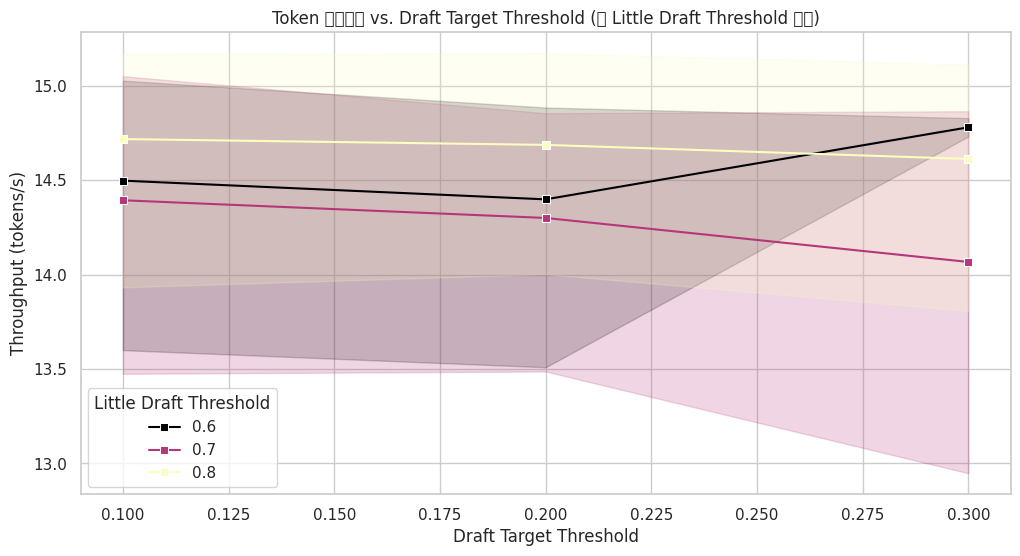

In [3]:
# 绘制折线图
plt.figure(figsize=(12, 6))

# 使用 hue 将 draft_target_threshold 分组
sns.lineplot(
    data=df, 
    x="little_draft_threshold", 
    y="throughput", 
    hue="draft_target_threshold",
    marker="o",
    palette="viridis"
)

plt.title("Token 生成速度 vs. Little Draft Threshold (按 Draft Target Threshold 分组)")
plt.xlabel("Little Draft Threshold (small_draft_threshold)")
plt.ylabel("Throughput (tokens/s)")
plt.legend(title="Draft Target Threshold")
plt.grid(True)
plt.show()

# 此外，也可以反过来画，看 Draft Target Threshold 的影响
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x="draft_target_threshold", 
    y="throughput", 
    hue="little_draft_threshold",
    marker="s",
    palette="magma"
)

plt.title("Token 生成速度 vs. Draft Target Threshold (按 Little Draft Threshold 分组)")
plt.xlabel("Draft Target Threshold")
plt.ylabel("Throughput (tokens/s)")
plt.legend(title="Little Draft Threshold")
plt.grid(True)
plt.show()

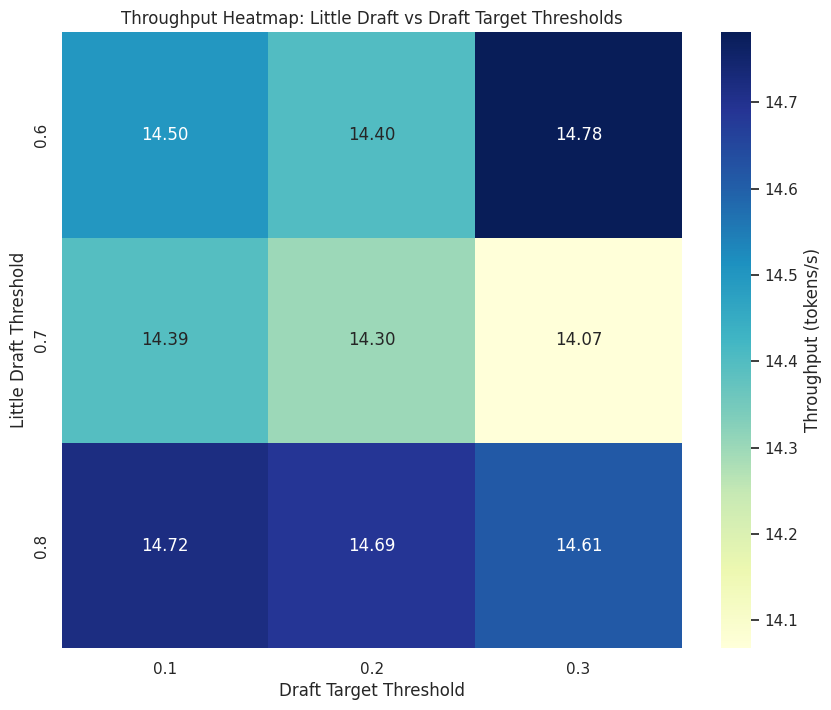

In [4]:
# 绘制热力图

# 1. 重塑数据：行=little_draft_threshold, 列=draft_target_threshold
# 如果同一对 (little_draft_threshold, draft_target_threshold) 有多条数据，默认取平均值
heatmap_data = df.pivot_table(
    index="little_draft_threshold", 
    columns="draft_target_threshold", 
    values="throughput",
    aggfunc='mean'
)

# 2. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Throughput (tokens/s)'}
)

plt.title("Throughput Heatmap: Little Draft vs Draft Target Thresholds")
# 注意：Heatmap 的 y 轴通常是从上到下的，这里为了直观可能需要根据数值大小排序检查一下
# seaborn 默认会按 index 排序，通常是从小到大，但画在图上是从上到下增长还是减少取决于 seaborn 版本和设置
# 这里默认即可，注意观察坐标轴标签

plt.xlabel("Draft Target Threshold")
plt.ylabel("Little Draft Threshold")
plt.show()

/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


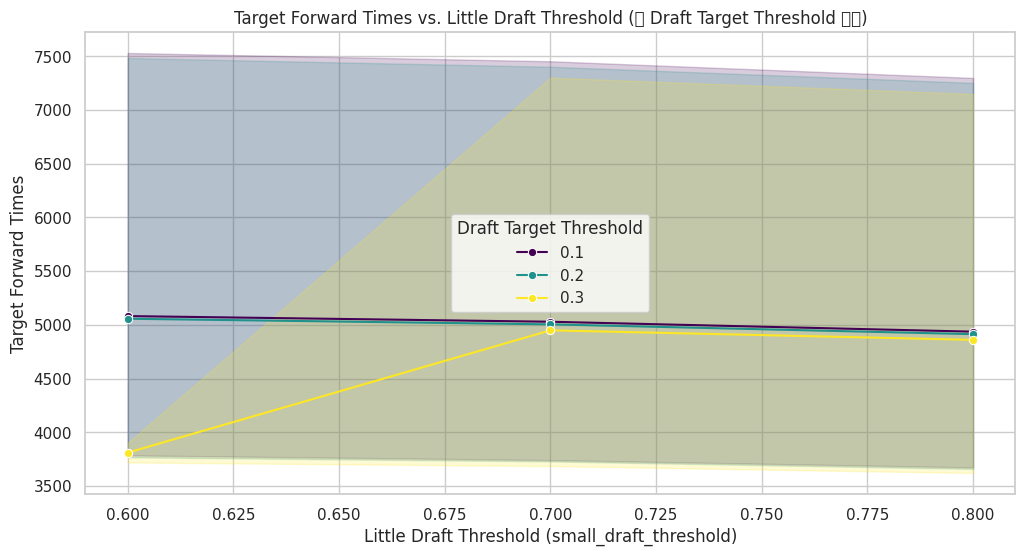

/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tiantianyi/miniconda3/envs/duodec_revise/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


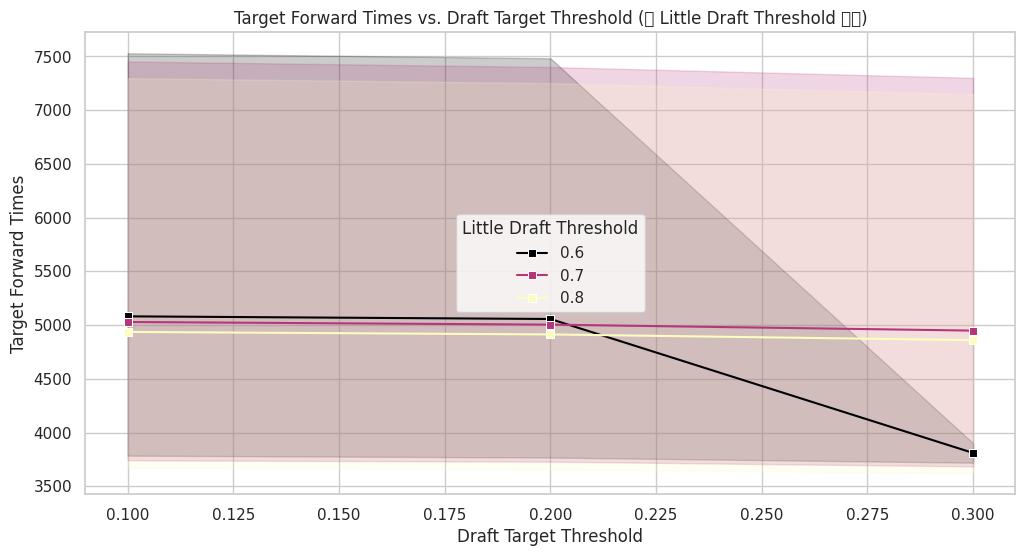

In [5]:
# --- 绘制 Target Forward Times 分析图 ---

# 绘制折线图
plt.figure(figsize=(12, 6))

# 使用 hue 将 draft_target_threshold 分组
sns.lineplot(
    data=df, 
    x="little_draft_threshold", 
    y="target_forward_times", 
    hue="draft_target_threshold",
    marker="o",
    palette="viridis"
)

plt.title("Target Forward Times vs. Little Draft Threshold (按 Draft Target Threshold 分组)")
plt.xlabel("Little Draft Threshold (small_draft_threshold)")
plt.ylabel("Target Forward Times")
plt.legend(title="Draft Target Threshold")
plt.grid(True)
plt.show()

# 反向分组
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x="draft_target_threshold", 
    y="target_forward_times", 
    hue="little_draft_threshold",
    marker="s",
    palette="magma"
)

plt.title("Target Forward Times vs. Draft Target Threshold (按 Little Draft Threshold 分组)")
plt.xlabel("Draft Target Threshold")
plt.ylabel("Target Forward Times")
plt.legend(title="Little Draft Threshold")
plt.grid(True)
plt.show()

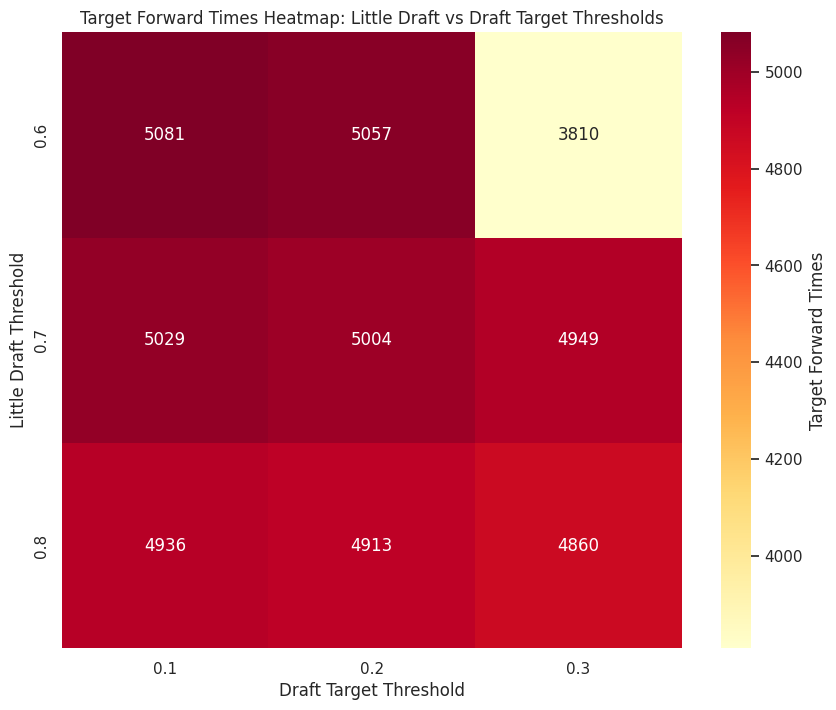

In [6]:
# 绘制 Target Forward Times 热力图

# 1. 重塑数据
heatmap_data_forward = df.pivot_table(
    index="little_draft_threshold", 
    columns="draft_target_threshold", 
    values="target_forward_times",
    aggfunc='mean'
)

# 2. 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data_forward, 
    annot=True, 
    fmt=".0f",  # 次数一般是整数，用 .0f 显示
    cmap="YlOrRd", # 使用不同的颜色映射以区分
    cbar_kws={'label': 'Target Forward Times'}
)

plt.title("Target Forward Times Heatmap: Little Draft vs Draft Target Thresholds")
plt.xlabel("Draft Target Threshold")
plt.ylabel("Little Draft Threshold")
plt.show()

In [19]:
# 找出每个数据集的最佳阈值组合（吞吐量最大），并展示全面指标
if not df.empty:
    # 按照 dataset 分组并找到 throughput 最大值的索引
    idx = df.groupby('dataset')['throughput'].idxmax()
    best_configs = df.loc[idx].copy()
    
    print("每个数据集的最佳阈值组合（吞吐量最大）及其详细指标：")
    columns_to_show = [
        'dataset', 
        'little_draft_threshold', 
        'draft_target_threshold', 
        'throughput', 
        'little_forward_times',
        'draft_forward_times',
        'target_forward_times',
        'computation_time',
        'comm_time', 
        'edge_cloud_data_MB', 
        'comm_energy'
    ]
    # 只显示存在的列
    columns_to_show = [c for c in columns_to_show if c in best_configs.columns]
    display(best_configs[columns_to_show])
else:
    print("没有可分析的数据。")

每个数据集的最佳阈值组合（吞吐量最大）及其详细指标：


,dataset,little_draft_threshold,draft_target_threshold,throughput,little_forward_times,draft_forward_times,target_forward_times,computation_time,comm_time,edge_cloud_data_MB,comm_energy
24,gsm8k,0.8,0.2,15.173699,5743,7730,3828,486.317126,2.275255,1.392941,1.137627
14,humaneval,0.8,0.1,15.053050,5807,7362,3673,502.251865,2.131476,1.299412,1.065738
6,mt_bench,0.8,0.2,14.003028,10893,14851,7252,1108.556709,4.452690,2.733747,2.226345
